In [29]:
import torch
from torch import nn
from torch.utils.data import Dataset
import pandas as pd
import cv2
import numpy as np
import os

class DeepFashionDataset(Dataset):
    def __init__(self,img_dir,train_path=None,test_path=None,validation_path=None,mode="train", transform=None, ):
        
        self.transform= transform
        self.img_dir = img_dir

        if mode=="train":
            assert(train_path is not None)
            self.file_list = train_path
        elif mode=="test":
            assert(test_path is not None)
            self.file_list = test_path
        elif mode=="validation":
            assert(validation_path is not None)
            self.file_list = validation_path
        else:
            return
        


        df = pd.read_csv(self.file_list, header=0)
        
        self.data = df["file"].to_numpy().tolist()
        self.ids = df["id"].to_numpy().tolist()
        self.main_labels = df["main_category"].to_numpy().tolist() # class id of each sample
        self.sub_labels = df["sub_category"].to_numpy().tolist()
        self.clothes_types = df["clothes_type"].to_numpy().tolist()
        self.source_types = df["source_type"].to_numpy().tolist()
        self.variation_types=df["variation_type"].to_numpy().tolist()
        self.bboxes = df["bbox"].to_numpy().tolist()
        self.landmarks = df["landmarks"].to_numpy().tolist()
        self.attributes = df["attributes"].to_numpy().tolist()
        self.labels = [i+"/"+j+"/"+k for i,j,k in zip(self.main_labels,self.sub_labels,self.ids)  ]
        del df

        self.unique_labels = set(self.labels)
        #
        # ["file","main_category","sub_category","clothes_type","source_type","variation_type","bbox","landmarks","attributes"]
        # with open(self.file_list,"r") as file : 
        #     lines = file.readlines()
        #     for line in lines[1:]:
        #         splitted_data = line.split(",")
        #         self.data.append(splitted_data[0])
        #         self.main_labels.append(splitted_data[1])
        #         self.sub_labels.append(splitted_data[2])
        #         self.clothes_types.append(splitted_data[3])
        #         self.source_types.append(splitted_data[4])
        #         self.variation_types.append(splitted_data[5])
        #         self.bboxes.append(eval(splitted_data[6]))
        #         self.landmarks.append(eval(splitted_data[7]))
        #         self.attributes.append(eval(splitted_data[8]))






        # for class_path in self.file_list:
        #     class_name = class_path.split("/")[-1]
        #     self.classes.append(class_name)
        #     for img_path in glob.glob(class_path + "/*.jpg"):
        #         self.data.append([img_path, class_name])
                
        self.idx_to_class = {i:j for i, j in enumerate(self.labels)}
        self.class_to_idx = {label: np.squeeze(np.where(np.array(self.labels) == label)).tolist()
                                 for label in self.unique_labels}

        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        class_name = self.labels[idx]
        img = cv2.imread(os.path.join(self.img_dir,*img_path.split("/")))
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2, 0, 1)
        
        if self.transform is not None:
            image = self.transform(img_tensor)
        else :
            image = img_tensor
        return image, class_name

In [30]:
dataset = DeepFashionDataset(img_dir="./img",train_path="DeepFashionDataset_train.csv",mode="train")

In [33]:
len(dataset)

159062

In [34]:
dataset.unique_labels

{'CLOTHING/Pants/id_00019835',
 'TOPS/Summer_Wear/id_00018269',
 'DRESSES/Dress/id_00011893',
 'TOPS/Summer_Wear/id_00028941',
 'TOPS/T_Shirt/id_00024908',
 'TOPS/Summer_Wear/id_00009622',
 'TOPS/Summer_Wear/id_00027548',
 'TOPS/Lace_Shirt/id_00006072',
 'TOPS/T_Shirt/id_00021093',
 'TROUSERS/Leggings/id_00022741',
 'TOPS/Coat/id_00005813',
 'TROUSERS/Leggings/id_00003274',
 'TOPS/Summer_Wear/id_00031608',
 'CLOTHING/Jeans/id_00022763',
 'TOPS/Summer_Wear/id_00023737',
 'TROUSERS/Summer_Wear/id_00016180',
 'TOPS/Lace_Shirt/id_00018960',
 'TOPS/T_Shirt/id_00019347',
 'TOPS/T_Shirt/id_00016401',
 'TOPS/Summer_Wear/id_00001605',
 'DRESSES/Dress/id_00006627',
 'TOPS/Coat/id_00002493',
 'TOPS/Summer_Wear/id_00031222',
 'TOPS/Summer_Wear/id_00005308',
 'TOPS/Coat/id_00020352',
 'TOPS/Summer_Wear/id_00032100',
 'TOPS/Summer_Wear/id_00015331',
 'TOPS/Tank_Top/id_00028230',
 'TOPS/Summer_Wear/id_00014739',
 'TOPS/Summer_Wear/id_00006122',
 'CLOTHING/Pants/id_00007130',
 'TOPS/T_Shirt/id_0001127

In [35]:
len(dataset.idx_to_class)

159062

In [36]:
len(dataset.class_to_idx)

17968

In [37]:
dataset.class_to_idx

{'CLOTHING/Pants/id_00019835': [2999,
  3000,
  3001,
  3002,
  3003,
  3004,
  3005,
  3006,
  3007],
 'TOPS/Summer_Wear/id_00018269': [76282,
  76283,
  76284,
  76285,
  76286,
  76287,
  76288,
  76289],
 'DRESSES/Dress/id_00011893': [12639, 12640, 12641, 12642],
 'TOPS/Summer_Wear/id_00028941': [93045,
  93046,
  93047,
  93048,
  93049,
  93050,
  93051,
  93052,
  93053],
 'TOPS/T_Shirt/id_00024908': [128416,
  128417,
  128418,
  128419,
  128420,
  128421,
  128422],
 'TOPS/Summer_Wear/id_00009622': [63582, 63583, 63584, 63585, 63586, 63587],
 'TOPS/Summer_Wear/id_00027548': [90261,
  90262,
  90263,
  90264,
  90265,
  90266,
  90267,
  90268,
  90269,
  90270,
  90271,
  90272,
  90273,
  90274,
  90275,
  90276,
  90277,
  90278],
 'TOPS/Lace_Shirt/id_00006072': [41053, 41054, 41055, 41056],
 'TOPS/T_Shirt/id_00021093': [125496, 125497, 125498, 125499, 125500],
 'TROUSERS/Leggings/id_00022741': [137928, 137929, 137930, 137931],
 'TOPS/Coat/id_00005813': [30730, 30731, 30732

In [38]:
dataset.__getitem__(0)

(tensor([[[107, 109, 110,  ...,  62,  62,  56],
          [107, 109, 110,  ...,  63,  60,  59],
          [105, 107, 109,  ...,  61,  60,  60],
          ...,
          [ 43,  45,  47,  ...,  13,  11,   6],
          [ 42,  45,  47,  ...,  15,  12,   9],
          [ 42,  45,  47,  ...,  18,  13,  14]],
 
         [[192, 194, 195,  ..., 151, 151, 148],
          [192, 194, 195,  ..., 152, 152, 151],
          [192, 194, 196,  ..., 153, 152, 152],
          ...,
          [146, 148, 150,  ...,  86,  86,  82],
          [145, 148, 150,  ...,  88,  87,  85],
          [145, 148, 150,  ...,  91,  90,  90]],
 
         [[248, 250, 251,  ..., 231, 231, 227],
          [248, 250, 251,  ..., 232, 231, 230],
          [248, 250, 252,  ..., 230, 229, 229],
          ...,
          [233, 235, 237,  ..., 166, 165, 164],
          [232, 235, 237,  ..., 168, 166, 167],
          [232, 235, 237,  ..., 171, 169, 173]]], dtype=torch.uint8),
 'CLOTHING/Blouse/id_00005025')

In [54]:
class TripletDeepFashion(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """

    def __init__(self, inner_dataset, mode="train"):
        self.inner_dataset = inner_dataset
        self.mode= mode
        
        self.data = self.inner_dataset.data
        self.labels= self.inner_dataset.labels
        self.labels_set = inner_dataset.unique_labels
        # keeps the sample indices belonging to each label:
        self.label_to_indices = inner_dataset.class_to_idx
        if mode != "train":
            # generate fixed triplets for testing

            random_state = np.random.RandomState(29)

            triplets = [[i,
                         random_state.choice(self.label_to_indices[self.labels[i].item()]),
                         random_state.choice(self.label_to_indices[
                                                 np.random.choice(
                                                     list(self.labels_set - set([self.labels[i].item()]))
                                                 )
                                             ])
                         ]
                        for i in range(len(self.data))]
            self.triplets = triplets

    def __getitem__(self, index):
        if self.mode == "train":
            #img1, label1 = self.data[index], self.labels[index].item()
            img1, label1 = self.inner_dataset.__getitem__(index)
            
            positive_index = index
            while positive_index == index:
                positive_index = np.random.choice(self.label_to_indices[label1])
            
            negative_label = np.random.choice(list(self.labels_set - set([label1])))
            negative_index = np.random.choice(self.label_to_indices[negative_label])

            img2, label2= self.inner_dataset.__getitem__(positive_index)
            img3, label3= self.inner_dataset.__getitem__(negative_index)
            print(index,positive_index)
            return (img1, img2, img3), [label1, label2, label3]
        else:
            img1, label1= self.inner_dataset.__getitem__(self.triplets[index][0])
            img2, label2 = self.inner_dataset.__getitem__(self.triplets[index][1])
            img3, label3= self.inner_dataset.__getitem__(self.triplets[index][2])

            return (img1, img2, img3), [label1, label2, label3]

    def __len__(self):
        return len(self.inner_dataset)

In [55]:
TripletDataset = TripletDeepFashion( dataset, mode="train")

In [56]:
TripletDataset.label_to_indices

{'CLOTHING/Pants/id_00019835': [2999,
  3000,
  3001,
  3002,
  3003,
  3004,
  3005,
  3006,
  3007],
 'TOPS/Summer_Wear/id_00018269': [76282,
  76283,
  76284,
  76285,
  76286,
  76287,
  76288,
  76289],
 'DRESSES/Dress/id_00011893': [12639, 12640, 12641, 12642],
 'TOPS/Summer_Wear/id_00028941': [93045,
  93046,
  93047,
  93048,
  93049,
  93050,
  93051,
  93052,
  93053],
 'TOPS/T_Shirt/id_00024908': [128416,
  128417,
  128418,
  128419,
  128420,
  128421,
  128422],
 'TOPS/Summer_Wear/id_00009622': [63582, 63583, 63584, 63585, 63586, 63587],
 'TOPS/Summer_Wear/id_00027548': [90261,
  90262,
  90263,
  90264,
  90265,
  90266,
  90267,
  90268,
  90269,
  90270,
  90271,
  90272,
  90273,
  90274,
  90275,
  90276,
  90277,
  90278],
 'TOPS/Lace_Shirt/id_00006072': [41053, 41054, 41055, 41056],
 'TOPS/T_Shirt/id_00021093': [125496, 125497, 125498, 125499, 125500],
 'TROUSERS/Leggings/id_00022741': [137928, 137929, 137930, 137931],
 'TOPS/Coat/id_00005813': [30730, 30731, 30732

In [57]:
TripletDataset.__getitem__(0)

0 2


((tensor([[[107, 109, 110,  ...,  62,  62,  56],
           [107, 109, 110,  ...,  63,  60,  59],
           [105, 107, 109,  ...,  61,  60,  60],
           ...,
           [ 43,  45,  47,  ...,  13,  11,   6],
           [ 42,  45,  47,  ...,  15,  12,   9],
           [ 42,  45,  47,  ...,  18,  13,  14]],
  
          [[192, 194, 195,  ..., 151, 151, 148],
           [192, 194, 195,  ..., 152, 152, 151],
           [192, 194, 196,  ..., 153, 152, 152],
           ...,
           [146, 148, 150,  ...,  86,  86,  82],
           [145, 148, 150,  ...,  88,  87,  85],
           [145, 148, 150,  ...,  91,  90,  90]],
  
          [[248, 250, 251,  ..., 231, 231, 227],
           [248, 250, 251,  ..., 232, 231, 230],
           [248, 250, 252,  ..., 230, 229, 229],
           ...,
           [233, 235, 237,  ..., 166, 165, 164],
           [232, 235, 237,  ..., 168, 166, 167],
           [232, 235, 237,  ..., 171, 169, 173]]], dtype=torch.uint8),
  tensor([[[ 50, 112, 129,  ...,  32,  3

In [43]:
TripletDataset.__getitem__(0)[0][0].shape

torch.Size([3, 300, 169])

100 99
['CLOTHING/Blouse/id_00008920', 'CLOTHING/Blouse/id_00008920', 'TOPS/Summer_Wear/id_00028213']


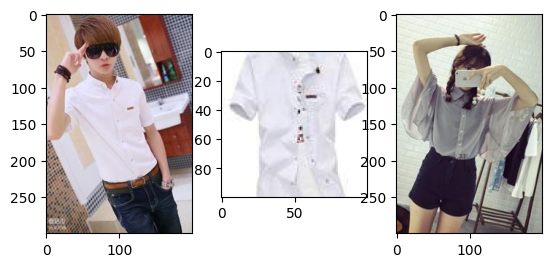

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

triplet = TripletDataset.__getitem__(100)

print(triplet[1])

f = plt.figure()
f.add_subplot(1,3,1)
plt.imshow(cv2.cvtColor(triplet[0][0].squeeze().permute(1,2,0).numpy(), cv2.COLOR_RGB2BGR))
f.add_subplot(1,3,2)
plt.imshow(cv2.cvtColor(triplet[0][1].squeeze().permute(1,2,0).numpy(), cv2.COLOR_RGB2BGR))
f.add_subplot(1,3,3)
plt.imshow(cv2.cvtColor(triplet[0][2].squeeze().permute(1,2,0).numpy(), cv2.COLOR_RGB2BGR))

plt.show()